# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [87]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz
import pydotplus

In [55]:
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(data_url)
x = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [56]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [57]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [58]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

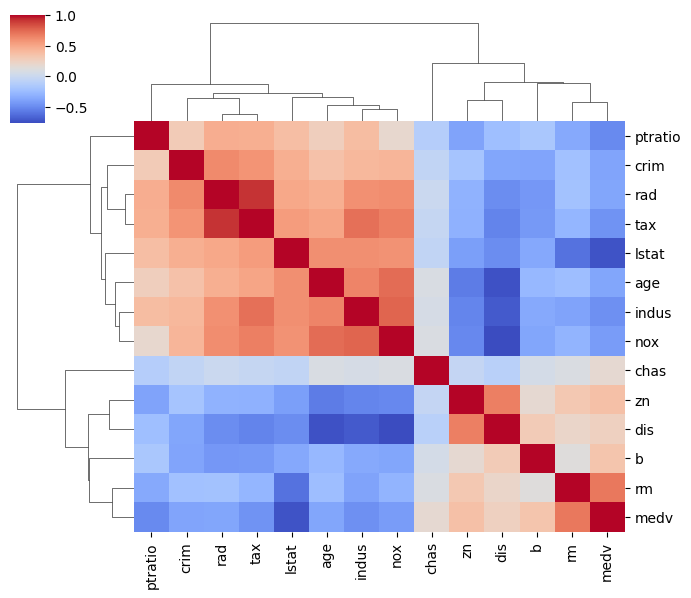

In [59]:
sns.clustermap(boston.corr(), figsize=[7, 6], cmap='coolwarm');

In [60]:
corr = boston['rad'].corr(boston['tax'])
porcentagem_corr = corr * 100
porcentagem_corr

91.02281885331836

<Axes: xlabel='rad', ylabel='tax'>

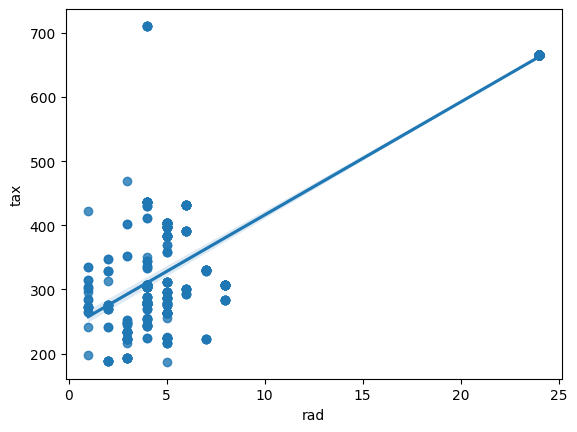

In [61]:
sns.regplot(boston, x='rad', y='tax')

As variaveis 'rad' e 'tax' possui potencial preditivo interessante, pois há uma correlação alta entre as variaveis

.


### 3. Separe os dados em validação e teste

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=20)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [74]:
len(x_train) == len(y_train)

True

In [75]:
regr1 = DecisionTreeRegressor(max_depth=8)
regr2 = DecisionTreeRegressor(max_depth=2)
regr1 = regr1.fit(x_train, y_train)
regr2 = regr2.fit(x_train, y_train)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [76]:
y_pred_train1 = regr1.predict(x_train)
y_pred_test1 = regr1.predict(x_test)
y_pred_train2 = regr2.predict(x_train)
y_pred_test2 = regr2.predict(x_test)


In [72]:
mse_train1 = mean_squared_error(y_train, y_pred_train1)
mse_test1 = mean_squared_error(y_test, y_pred_test1)
mse_train2 = mean_squared_error(y_train, y_pred_train2)
mse_test2 = mean_squared_error(y_test, y_pred_test2)

print("MSE para árvore com profundidade 8 - Treinamento:", mse_train1)
print("MSE para árvore com profundidade 8 Teste:", mse_test1)
print('---------------------------------------')
print("MSE para árvorev com profundidade 2 - Treinamento:", mse_train2)
print("MSE para árvore profundidade 2 - Teste:", mse_test2)

MSE para árvore com profundidade 8 - Treinamento: 0.9865081539567462
MSE para árvore com profundidade 8 Teste: 36.53876053808555
---------------------------------------
MSE para árvorev com profundidade 2 - Treinamento: 25.09641007496116
MSE para árvore profundidade 2 - Teste: 36.7393212833419


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

####*A arvore com profundidade 8 parece mais adequada pois seu MSE é menor*

.


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

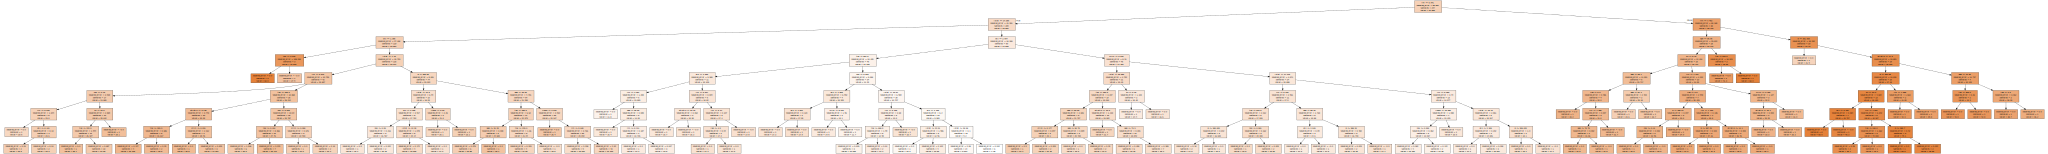

In [93]:
dot_data = export_graphviz(regr1, out_file=None, feature_names=x.columns, filled=True)
graph = graphviz.Source(dot_data)
graph

O lstat parece mais "importante" na árvore